## Phase 1: Data Engineering

In [1]:
import pandas as pd
df = pd.read_csv("./House-Price-Data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1. Is the SalePrice column normally distributed or not?
Back up your answer with a statistical test. Make sure you provide your interpretation of its results.

**Normal distribution**
- Mean ~=median
- 68% of the data lies within one standard deviation of the mean
- 95% lies within two standard deviations
- Symmetry around the mean
- 50% of values are to the right of the mean (i.e. > the mean), 50% are to the left of the mean (i.e. < the mean)

Basic Statistics:
- Mean: $180,921.20
- Median: $163,000.00
- Std Dev: $79,442.50


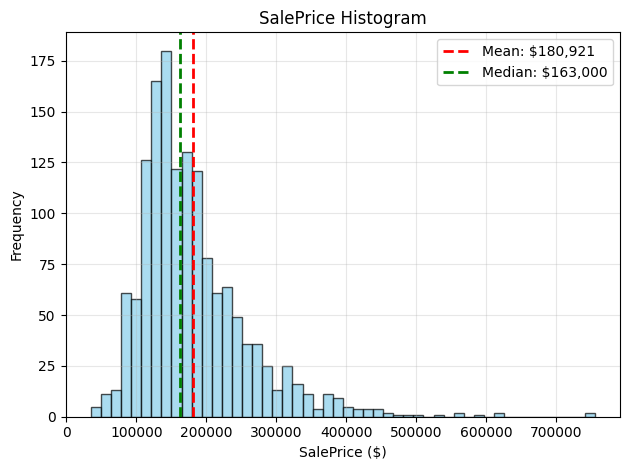

In [2]:
import matplotlib.pyplot as plt

mean = df['SalePrice'].mean()
median = df['SalePrice'].median()
std = df['SalePrice'].std()
print(f"Basic Statistics:")
print(f"- Mean: ${mean:,.2f}")
print(f"- Median: ${median:,.2f}")
print(f"- Std Dev: ${std:,.2f}")

plt.hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean:,.0f}')
plt.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Median: ${median:,.0f}')
plt.xlabel('SalePrice ($)')
plt.ylabel('Frequency')
plt.title('SalePrice Histogram')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [3]:
print(f"Mean-Median difference: ${(abs(mean - median) / median)*100:,.2f}%")

Mean-Median difference: $10.99%


The 11% difference between the mean and median indicates skewness. In a perfectly normal distribution, the mean equals the median. This deviation, combined with the visual right tail in the histogram, confirms that the distribution is not perfectly symmetric.

In [4]:
# 68% within 1 std, 95% within 2 std
within_1std = df[(df['SalePrice'] >= mean - std) & (df['SalePrice'] <= mean + std)]
pct_1std = (len(within_1std) / len(df)) * 100

within_2std = df[(df['SalePrice'] >= mean - 2*std) & (df['SalePrice'] <= mean + 2*std)]
pct_2std = (len(within_2std) / len(df)) * 100

print(f"Data within 1 std dev of mean: {pct_1std:.2f}% {abs(pct_1std-68):.2f}% diff")
print(f"Data within 2 std dev of mean: {pct_2std:.2f}% {abs(pct_2std-95):.2f}% diff")

Data within 1 std dev of mean: 78.42% 10.42% diff
Data within 2 std dev of mean: 95.68% 0.68% diff


78.42% of the data lies within 1 standard deviation (Expected: 68%). The difference of 10.42% is acceptable for real-world data. 95.68% lies within 2 standard deviations (Expected: 95%), which is nearly perfect. Overall, the 68-95 rule is approximately satisfied.

In [5]:
# Symmetry
left_of_mean = df[df['SalePrice'] < mean]
right_of_mean = df[df['SalePrice'] >= mean]

pct_left = (len(left_of_mean) / len(df)) * 100
pct_right = (len(right_of_mean) / len(df)) * 100

print(f"Values < mean: {pct_left:.2f}%")
print(f"Values ≥ mean: {pct_right:.2f}% ")

Values < mean: 61.64%
Values ≥ mean: 38.36% 


61.64% of values are below the mean and 38.36% are above. This imbalance indicates the distribution is right-skewed (longer tail on the right side), confirming non-symmetry.

#### Final Conclusion

Based on all criteria analyzed:
- Mean ≈ Median: Shows slight difference (11% gap) - suggests some skewness
- 68-95 Rule: Approximately satisfied (78% and 96%)
- Symmetry: 61-39 split indicates right skew
- Histogram: Bell-shaped but with right tail visible

SalePrice is approximately normally distributed with slight right skewness.  
Although statistical tests reject strict normality (common with large sample sizes), the distribution satisfies the 68-95 rule reasonably well and is visually bell-shaped. Given the large sample size (n=1460), the Central Limit Theorem implies that the sampling distribution of the mean will be approximately normal. This robustness allows for the use of parametric tests like t-tests and ANOVA without strict adherence to the normality assumption (Lumley et al., 2002; Ghasemi & Zahediasl, 2012).

### 2. Barchart for categorical variables
For the categorical variables in the data, draw a barchart that shows the cardinality of each variable. Make sure the variables are sorted based on the cardinality value (in ascending or descending order, it is up to you).

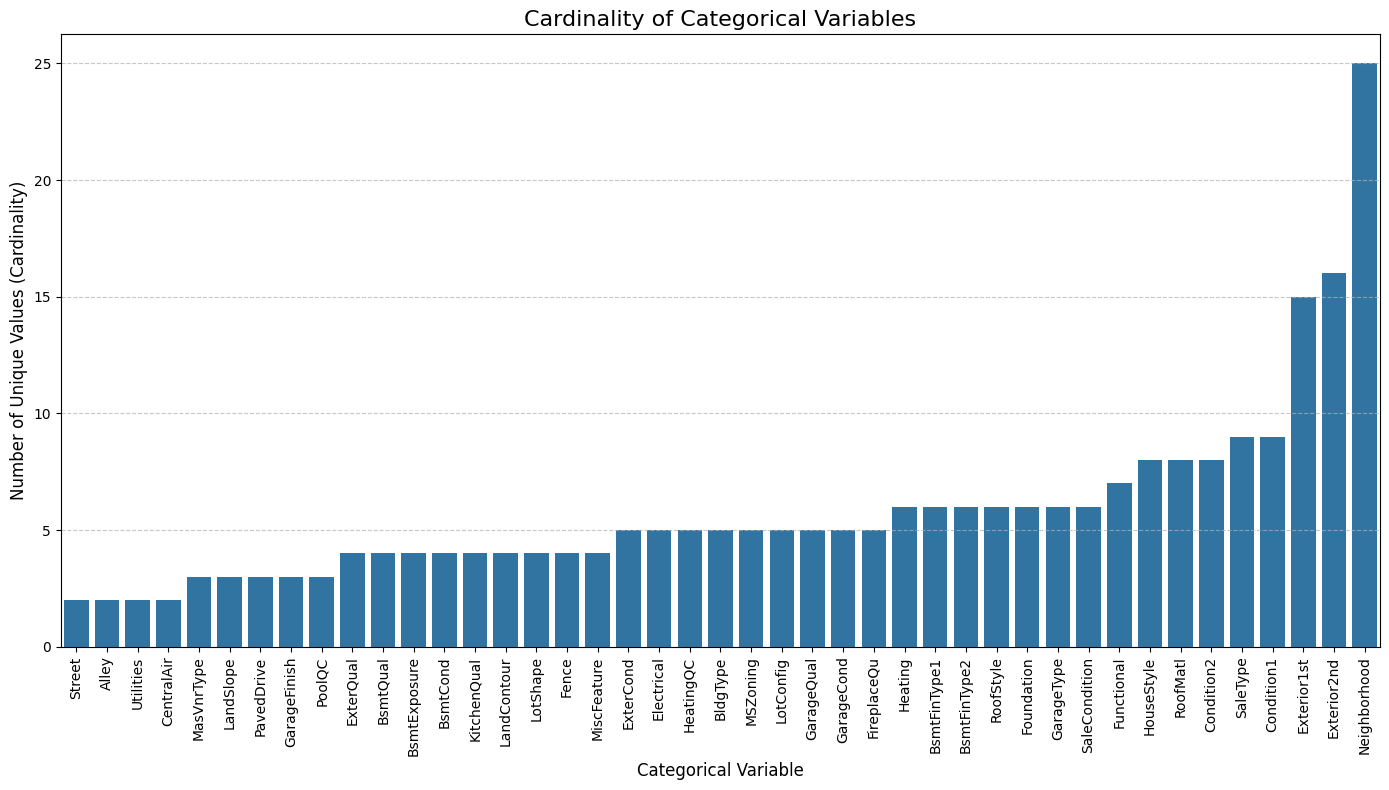

In [6]:
import seaborn as sns

categorical_cols = df.select_dtypes(include=['object']).columns
cardinality = df[categorical_cols].nunique()
sorted_cardinality = cardinality.sort_values()

plt.figure(figsize=(14, 8))
sns.barplot(x=sorted_cardinality.index, y=sorted_cardinality.values)
plt.xticks(rotation=90)
plt.xlabel('Categorical Variable', fontsize=12)
plt.ylabel('Number of Unique Values (Cardinality)', fontsize=12)
plt.title('Cardinality of Categorical Variables', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Interpretation
The chart shows the cardinality (number of unique values) for every categorical variable in the dataset.
- *Low Cardinality (left side):* Variables like Street, Alley, and CentralAir are simple, with only 2-3 categories. They are easy to work with
- *High Cardinality (right side):* Variables like Exterior1st (15), Exterior2nd (16), and especially Neighborhood (25) are more complex

### 3. Clear data
Drop all columns that have more than 30% of their data missing, after that drop all rows that contain any missing data.

In [7]:
print(f"Original shape: {df.shape}")

# Drop columns with >30% missing data
threshold = len(df) * 0.7 
df_cleaned_cols = df.dropna(axis='columns', thresh=threshold)

# Identify which columns were dropped
dropped_cols = set(df.columns) - set(df_cleaned_cols.columns)

print(f"\nColumns dropped: {list(dropped_cols)}")
print(f"\nShape after dropping columns: {df_cleaned_cols.shape}")

Original shape: (1460, 81)

Columns dropped: ['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'MasVnrType', 'Alley']

Shape after dropping columns: (1460, 75)


In [8]:
# Drop rows with any remaining missing data
df_final = df_cleaned_cols.dropna(axis='index')

print(f"Rows removed: {len(df.index) - len(df_final.index)}")
print(f"Shape after dropping rows with any missing data: {df_final.shape}")

df_final.head()

Rows removed: 366
Shape after dropping rows with any missing data: (1094, 75)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### 4. Central Air vs Sale Price (Hypothesis Test)
Is there a statistically significant difference in the mean sale price (SalePrice) between houses with and without central air conditioning (CentralAir)?

Here we need to compare two variables: price with central airconditioning, and price without central airconditioning. Because we want to compare if the mean of two variables are the same, we can conduct a one-sided t-test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).
We can run an additional test to define if the variances are same for both variable's population using levene test (https://docs.scipy.org/doc//scipy-1.16.2/reference/generated/scipy.stats.levene.html).  
- If the variance is the same, we can use equal_var = True to perform a standard independent 2 sample test
- If the variance is different, we can use equal_var = False to perform Welch's t-test, which does not assume equal population variance

In [25]:
from scipy import stats

df = df_final.copy()

group_yes = df[df['CentralAir'] == 'Y']['SalePrice']
group_no = df[df['CentralAir'] == 'N']['SalePrice']

# Descriptive statistics
print(f"Group 'Y' (With AC): n={len(group_yes)}, Mean=${group_yes.mean():,.2f}, Std=${group_yes.std():,.2f}")
print(f"Group 'N' (No AC):   n={len(group_no)}, Mean=${group_no.mean():,.2f}, Std=${group_no.std():,.2f}")

# Levene's Test
stat, p_levene = stats.levene(group_yes, group_no)
print(f"\nLevene's Test p-value: {p_levene:.5e}")

if p_levene < 0.05:
    print("Variances are significantly different (p < 0.05), Welch's t-test is needed")
    equal_var = False
else:
    print("Variances are equal, no need for Welch's t-test (p >= 0.05)")
    equal_var = True

t_stat, p_value = stats.ttest_ind(group_yes, group_no, equal_var=equal_var)

print(f"\nResults")
print(f"t-statistic: {t_stat:.4f}")

print(f"p-value: {p_value:.10e}")

Group 'Y' (With AC): n=1036, Mean=$191,211.83, Std=$82,927.03
Group 'N' (No AC):   n=58, Mean=$112,395.47, Std=$42,078.89

Levene's Test p-value: 8.55860e-04
Variances are significantly different (p < 0.05), Welch's t-test is needed

Results
t-statistic: 12.9283
p-value: 1.0533246404e-21


We first checked the assumption of equal variances using Levene's test. The result (p < 0.05) indicates that the variances of the two groups (with vs without central air) are significantly different. Consequently, we proceeded with Welch's t‑test (by setting equal_var=False), which does not assume equal variances.

- The t‑test yielded an extremely small p‑value (p < 0.05), so we reject the null hypothesis. This provides strong statistical evidence that houses with central air conditioning have a significantly higher mean sale price than those without
- The test produced a t‑statistic of 12.93, which is very large in absolute value. The observed difference in mean prices (about $78,800) is many standard errors away from zero, so such a large difference would be extremely unlikely to arise by random chance if the true means were equal

### 5. Does the mean sale price differ significantly across different Neighborhoods?

In [22]:
neighborhoods = df['Neighborhood'].unique()
len(neighborhoods)

25

Here we need to compare 25 different mean prices across each other, which means that we can use the ANOVA test.  
Standard ANOVA assumes equal variances, so we run again the Levene's test to see if the variance is homogene.

In [27]:
df = df_final.copy()

# Descriptive statistics by neighborhood
neighborhood_stats = df.groupby('Neighborhood')['SalePrice'].agg(['count','mean','std']).sort_values('mean')

print("SalePrice by Neighborhood (sorted by mean):")
print(neighborhood_stats.to_string(formatters={
    'mean': lambda x: f"${x:,.0f}",
    'std':  lambda x: f"${x:,.0f}"
}))

price_groups = [df[df['Neighborhood'] == ne]['SalePrice'] for ne in neighborhoods]

# Levene's Test
stat, p_levene = stats.levene(*price_groups)
print(f"\nLevene's Test p-value: {p_levene:.3e}")

if p_levene < 0.05:
    print("Variances are significantly different (p < 0.05), Welch's ANOVA test is needed")
    equal_var = False
else:
    print("Variances are equal, no need for Welch's ANOVA test (p >= 0.05)")
    equal_var = True

f_stat, p_value = stats.f_oneway(*price_groups, equal_var=equal_var)

print(f"\nResults")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.10e}")

SalePrice by Neighborhood (sorted by mean):
              count     mean      std
Neighborhood                         
IDOTRR           27 $102,544  $30,923
MeadowV          10 $104,730  $27,625
BrDale           15 $105,360  $14,393
OldTown          96 $132,607  $54,778
BrkSide          42 $134,764  $35,528
Edwards          65 $136,057  $42,334
Blueste           2 $137,500  $19,092
Sawyer           44 $137,640  $19,794
SWISU            19 $141,941  $33,398
NPkVill           7 $144,643   $8,755
NAmes           173 $148,346  $33,339
Mitchel          30 $158,938  $33,809
NWAmes           45 $184,211  $35,511
SawyerW          44 $190,441  $56,769
Blmngtn          14 $191,790  $30,947
Gilbert          49 $194,059  $41,871
CollgCr         122 $198,878  $49,812
Crawfor          41 $203,298  $69,563
ClearCr          11 $213,227  $59,301
Somerst          75 $230,587  $57,637
Timber           29 $252,498  $66,765
Veenker           7 $258,714  $74,470
NridgHt          74 $316,650  $95,236
StoneB

p-value is very, small so we can reject the Null Hypothesis.  
There is a statistically significant difference in mean SalePrice across Neighborhoods.

We first examined the homogeneity of variances across neighborhoods using Levene’s test. The resulting p‑value (p < 0.05) indicates that the variances of SalePrice differ significantly between neighborhoods. Because of this violation of the equal-variance assumption, we used Welch’s ANOVA by setting equal_var=False in stats.f_oneway, which relaxes the assumption of equal population variances.

The ANOVA returned an F‑statistic of 41.7607 with an associated p‑value of 4.8826208689e-42, which is far below the 0.05 significance level. The F‑statistic measures how large the variability between neighborhood means is relative to the variability within neighborhoods; Such a large F‑value indicates that the differences in mean SalePrice between neighborhoods are large relative to the random variation in prices within each neighborhood.

Since the p‑value is extremely small (p < 0.05), we reject the null hypothesis that all neighborhoods have the same mean SalePrice. There is strong statistical evidence that mean house prices differ significantly across neighborhoods, confirming that location is an important determinant of price.